# Zepto Sales Data Analysis Project

## Project Overview

Welcome, aspiring Data Analysts! This project is designed to give you hands-on experience with real-world, industry-grade sales data from Zepto, a popular quick-commerce platform. You will apply your Python skills, particularly using the Pandas and Matplotlib libraries, to explore, clean, analyze, and visualize a dataset containing over 200,000 sales records and a product catalog.

This project will reinforce your understanding of data manipulation, data cleaning techniques, and fundamental data visualization, preparing you for more complex analytical tasks.

## Dataset Description

You will be working with two CSV files:

1.  `zepto_sales.csv`: Contains individual sales transactions.
2.  `zepto_products.csv`: Contains details about the products sold.

### `zepto_sales.csv` Columns:

*   `order_id`: Unique identifier for each order.
*   `order_date`: Date and time of the order.
*   `product_id`: Identifier for the product sold in the transaction.
*   `quantity`: Number of units of the product sold.
*   `city`: City where the order was placed.
*   `delivery_status`: Status of the delivery (e.g., Delivered, Cancelled, Returned).
*   `customer_id`: Unique identifier for the customer.
*   `delivery_time_mins`: Time taken for delivery in minutes.
*   `total_amount`: Total amount of the transaction.

### `zepto_products.csv` Columns:

*   `product_id`: Unique identifier for the product.
*   `product_name`: Name of the product.
*   `category`: Category of the product.
*   `base_price`: Base price of the product.

**Before you begin, ensure `zepto_sales.csv` and `zepto_products.csv` are in the same directory as this notebook.**

Let's get started!

## Step 1: Load and Initial Exploration

First, you need to load the datasets into Pandas DataFrames and perform an initial exploration to understand their structure and content. This step is crucial for getting a first glance at your data, checking data types, identifying potential issues, and understanding the overall scale of the dataset.

We will use the following Pandas methods:

*   `pd.read_csv()`: To load data from CSV files.
*   `.info()`: To get a concise summary of the DataFrame, including data types and non-null values.
*   `.describe()`: To generate descriptive statistics of numerical columns.
*   `.shape`: To get the number of rows and columns.
*   `.head()`: To view the first few rows of the DataFrame.
*   `.tail()`: To view the last few rows of the DataFrame.

In [ ]:
import pandas as pd

# Load the datasets
df_sales = pd.read_csv("/content/sample_data/zepto_sales.csv")
df_products = pd.read_csv("/content/sample_data/zepto_products.csv")

# Display basic information for sales data
print("--- Sales Data Info ---")
df_sales.info()
print("--- Sales Data Description ---")
print(df_sales.describe())
print("--- Sales Data Shape ---")
print(df_sales.shape)
print("--- Sales Data Head ---")
print(df_sales.head())
print("--- Sales Data Tail ---")
print(df_sales.tail())

# Display basic information for products data
print("--- Products Data Info ---")
df_products.info()
print("--- Products Data Description ---")
print(df_products.describe())
print("--- Products Data Head ---")
print(df_products.head())

--- Sales Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76595 entries, 0 to 76594
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            76595 non-null  int64  
 1   order_date          76595 non-null  object 
 2   product_id          76594 non-null  float64
 3   quantity            76594 non-null  float64
 4   city                76203 non-null  object 
 5   delivery_status     76205 non-null  object 
 6   customer_id         76594 non-null  float64
 7   delivery_time_mins  75037 non-null  float64
 8   total_amount        76594 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 5.3+ MB
--- Sales Data Description ---
            order_id    product_id      quantity   customer_id  \
count   76595.000000  76594.000000  76594.000000  76594.000000   
mean   152381.879940    119.278494      1.546479  60049.487923   
std     30126.109132     12.114548    

## Step 2: Data Cleaning - Handling Missing Values and Duplicates

Real-world datasets are rarely perfect; they often contain missing values (NaN) and duplicate entries that can skew your analysis. This step focuses on identifying and rectifying these common data quality issues.

**Handling Missing Values:**

*   For the `city` and `delivery_status` columns, we will remove the records (rows) that contain `NaN` values. This is a common strategy when the missing data is a small percentage and cannot be reliably imputed, or when the missingness itself might indicate an issue.
*   For the `delivery_time_mins` column, we will fill missing values with the mean of the column. Imputation with the mean is suitable for numerical data when the missingness is assumed to be random and the mean is a representative central tendency.

**Handling Duplicate Records:**

*   We will identify and remove any entirely duplicate rows in the sales data. Duplicate records can lead to overcounting and biased statistics, so it's important to ensure each observation is unique.

Finally, we will convert the `order_date` column to a proper datetime format, which is essential for time-series analysis.

In [ ]:
# Check for null values in sales data
print("--- Null Values in Sales Data (Before Cleaning) ---")
print(df_sales.isnull().sum())

# Handle null values in 'city' and 'delivery_status' by dropping rows
df_sales.dropna(subset=["city", "delivery_status"], inplace=True)
print("Nulls after dropping rows in city/delivery_status:")
print(df_sales[["city", "delivery_status"]].isnull().sum())

# Handle null values in 'delivery_time_mins' by filling with the mean
# Calculate mean AFTER dropping rows, to ensure it's based on cleaned data
mean_delivery_time = df_sales["delivery_time_mins"].mean()
df_sales["delivery_time_mins"].fillna(mean_delivery_time, inplace=True)
print("Nulls after filling mean in delivery_time_mins:")
print(df_sales["delivery_time_mins"].isnull().sum())

# Check for duplicate records
print("--- Duplicate Records in Sales Data ---")
print(f"Number of duplicate rows: {df_sales.duplicated().sum()}")

# Remove duplicate records
df_sales.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {df_sales.shape[0]}")

# Convert 'order_date' to datetime objects
df_sales["order_date"] = pd.to_datetime(df_sales["order_date"])
print("--- Data Types After Cleaning and Conversion ---")
df_sales.info()

--- Null Values in Sales Data (Before Cleaning) ---
order_id                 0
order_date               0
product_id               1
quantity                 1
city                   392
delivery_status        390
customer_id              1
delivery_time_mins    1558
total_amount             1
dtype: int64
Nulls after dropping rows in city/delivery_status:
city               0
delivery_status    0
dtype: int64
Nulls after filling mean in delivery_time_mins:
0
--- Duplicate Records in Sales Data ---
Number of duplicate rows: 28
Number of rows after removing duplicates: 75786
--- Data Types After Cleaning and Conversion ---
<class 'pandas.core.frame.DataFrame'>
Index: 75786 entries, 0 to 76593
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            75786 non-null  int64         
 1   order_date          75786 non-null  datetime64[ns]
 2   product_id          75786 non-null  fl

/tmp/ipython-input-2969825063.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sales["delivery_time_mins"].fillna(mean_delivery_time, inplace=True)


## Step 3: Data Analysis - Aggregations and Grouping

With our data cleaned, we can now start extracting meaningful insights. This step involves performing various aggregations and grouping operations using Pandas to answer specific business questions about Zepto's sales performance.

We will cover:

*   **Summary Statistics**: Calculating minimum, maximum, and average values for key metrics.
*   **Top Performers**: Identifying the best-selling products and cities by total sales amount.
*   **Trends**: Analyzing sales patterns over time (e.g., monthly sales).
*   **Categorical Breakdown**: Understanding sales distribution across different product categories and cities.

These operations are fundamental to understanding the underlying patterns and drivers within your dataset.

In [ ]:
# Find min, max, and average total amount
min_amount = df_sales["total_amount"].min()
max_amount = df_sales["total_amount"].max()
avg_amount = df_sales["total_amount"].mean()
print(f"Min Total Amount: {min_amount:.2f}")
print(f"Max Total Amount: {max_amount:.2f}")
print(f"Average Total Amount: {avg_amount:.2f}")

# Top 5 products by total sales amount
top_products = df_sales.groupby("product_id")["total_amount"].sum().nlargest(5)
print("--- Top 5 Products by Sales Amount ---")
print(top_products)

# Merge with product details to get product names
top_products_details = top_products.reset_index().merge(df_products, on="product_id")
print("--- Top 5 Products by Sales Amount (with names) ---")
print(top_products_details[["product_name", "category", "total_amount"]])

# Total sales by city
sales_by_city = df_sales.groupby("city")["total_amount"].sum().sort_values(ascending=False)
print("--- Total Sales by City ---")
print(sales_by_city)

# Average delivery time by city
avg_delivery_time_by_city = df_sales.groupby("city")["delivery_time_mins"].mean().sort_values()
print("--- Average Delivery Time by City (minutes) ---")
print(avg_delivery_time_by_city)

# Sales trend over time (e.g., monthly sales)
df_sales["month"] = df_sales["order_date"].dt.to_period("M")
monthly_sales = df_sales.groupby("month")["total_amount"].sum()
print("--- Monthly Sales Trend ---")
print(monthly_sales)

# Sales by product category
sales_by_category = df_sales.merge(df_products, on="product_id")
sales_by_category = sales_by_category.groupby("category")["total_amount"].sum().sort_values(ascending=False)
print("--- Total Sales by Product Category ---")
print(sales_by_category)

Min Total Amount: 23.25
Max Total Amount: 2656.85
Average Total Amount: 301.63
--- Top 5 Products by Sales Amount ---
product_id
134.0    4097679.69
112.0    2759192.94
135.0    2166886.26
131.0    1664853.24
129.0    1608456.99
Name: total_amount, dtype: float64
--- Top 5 Products by Sales Amount (with names) ---
    product_name              category  total_amount
0       Handwash         Personal Care    4097679.69
1    Paneer 200g          Dairy & Eggs    2759192.94
2     Toothpaste         Personal Care    2166886.26
3   Toilet Paper  Household Essentials    1664853.24
4  Detergent 1kg  Household Essentials    1608456.99
--- Total Sales by City ---
city
Mumbai       8044700.05
Bangalore    5682528.01
Delhi        3445808.76
Hyderabad    1847649.59
Pune         1605510.65
Kolkata       896253.94
Chennai       861750.30
Ahmedabad     475308.16
Name: total_amount, dtype: float64
--- Average Delivery Time by City (minutes) ---
city
Ahmedabad    25.646462
Hyderabad    25.732963
Pune   

## Step 4: Data Visualization with Matplotlib & Seaborn

Data visualization is a powerful way to communicate insights from your analysis. In this step, you will use Matplotlib and Seaborn to create a comprehensive set of charts that visually represent the findings from your data analysis.

We will create a 3x3 grid of 9 diverse plots to showcase different aspects of the Zepto sales data. Remember to make your plots clear, well-labeled, and easy to interpret. Good visualizations tell a story at a glance.

**Charts to be generated:**

1.  **Line Chart**: Monthly Sales Trend
2.  **Bar Chart**: Total Sales by City
3.  **Pie Chart**: Sales by Product Category
4.  **Histogram**: Distribution of Delivery Times
5.  **Scatter Plot**: Quantity vs. Total Amount
6.  **Count Plot**: Delivery Status Distribution
7.  **Box Plot**: Delivery Time by City
8.  **Bar Plot**: Top 5 Products by Quantity Sold
9.  **Heatmap**: Sales by City and Month

Each plot will be generated with appropriate titles, labels, and styling to ensure professionalism.

/tmp/ipython-input-1247990124.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette='magma', ax=axes[0, 1])
/tmp/ipython-input-1247990124.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='delivery_status', data=df_sales, palette='deep', ax=axes[1, 2])
/tmp/ipython-input-1247990124.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city', y='delivery_time_mins', data=df_sales, palette='coolwarm', ax=axes[2, 0])
/tmp/ipython-input-1247990124.py:58: FutureWarning: 

Passing `pal

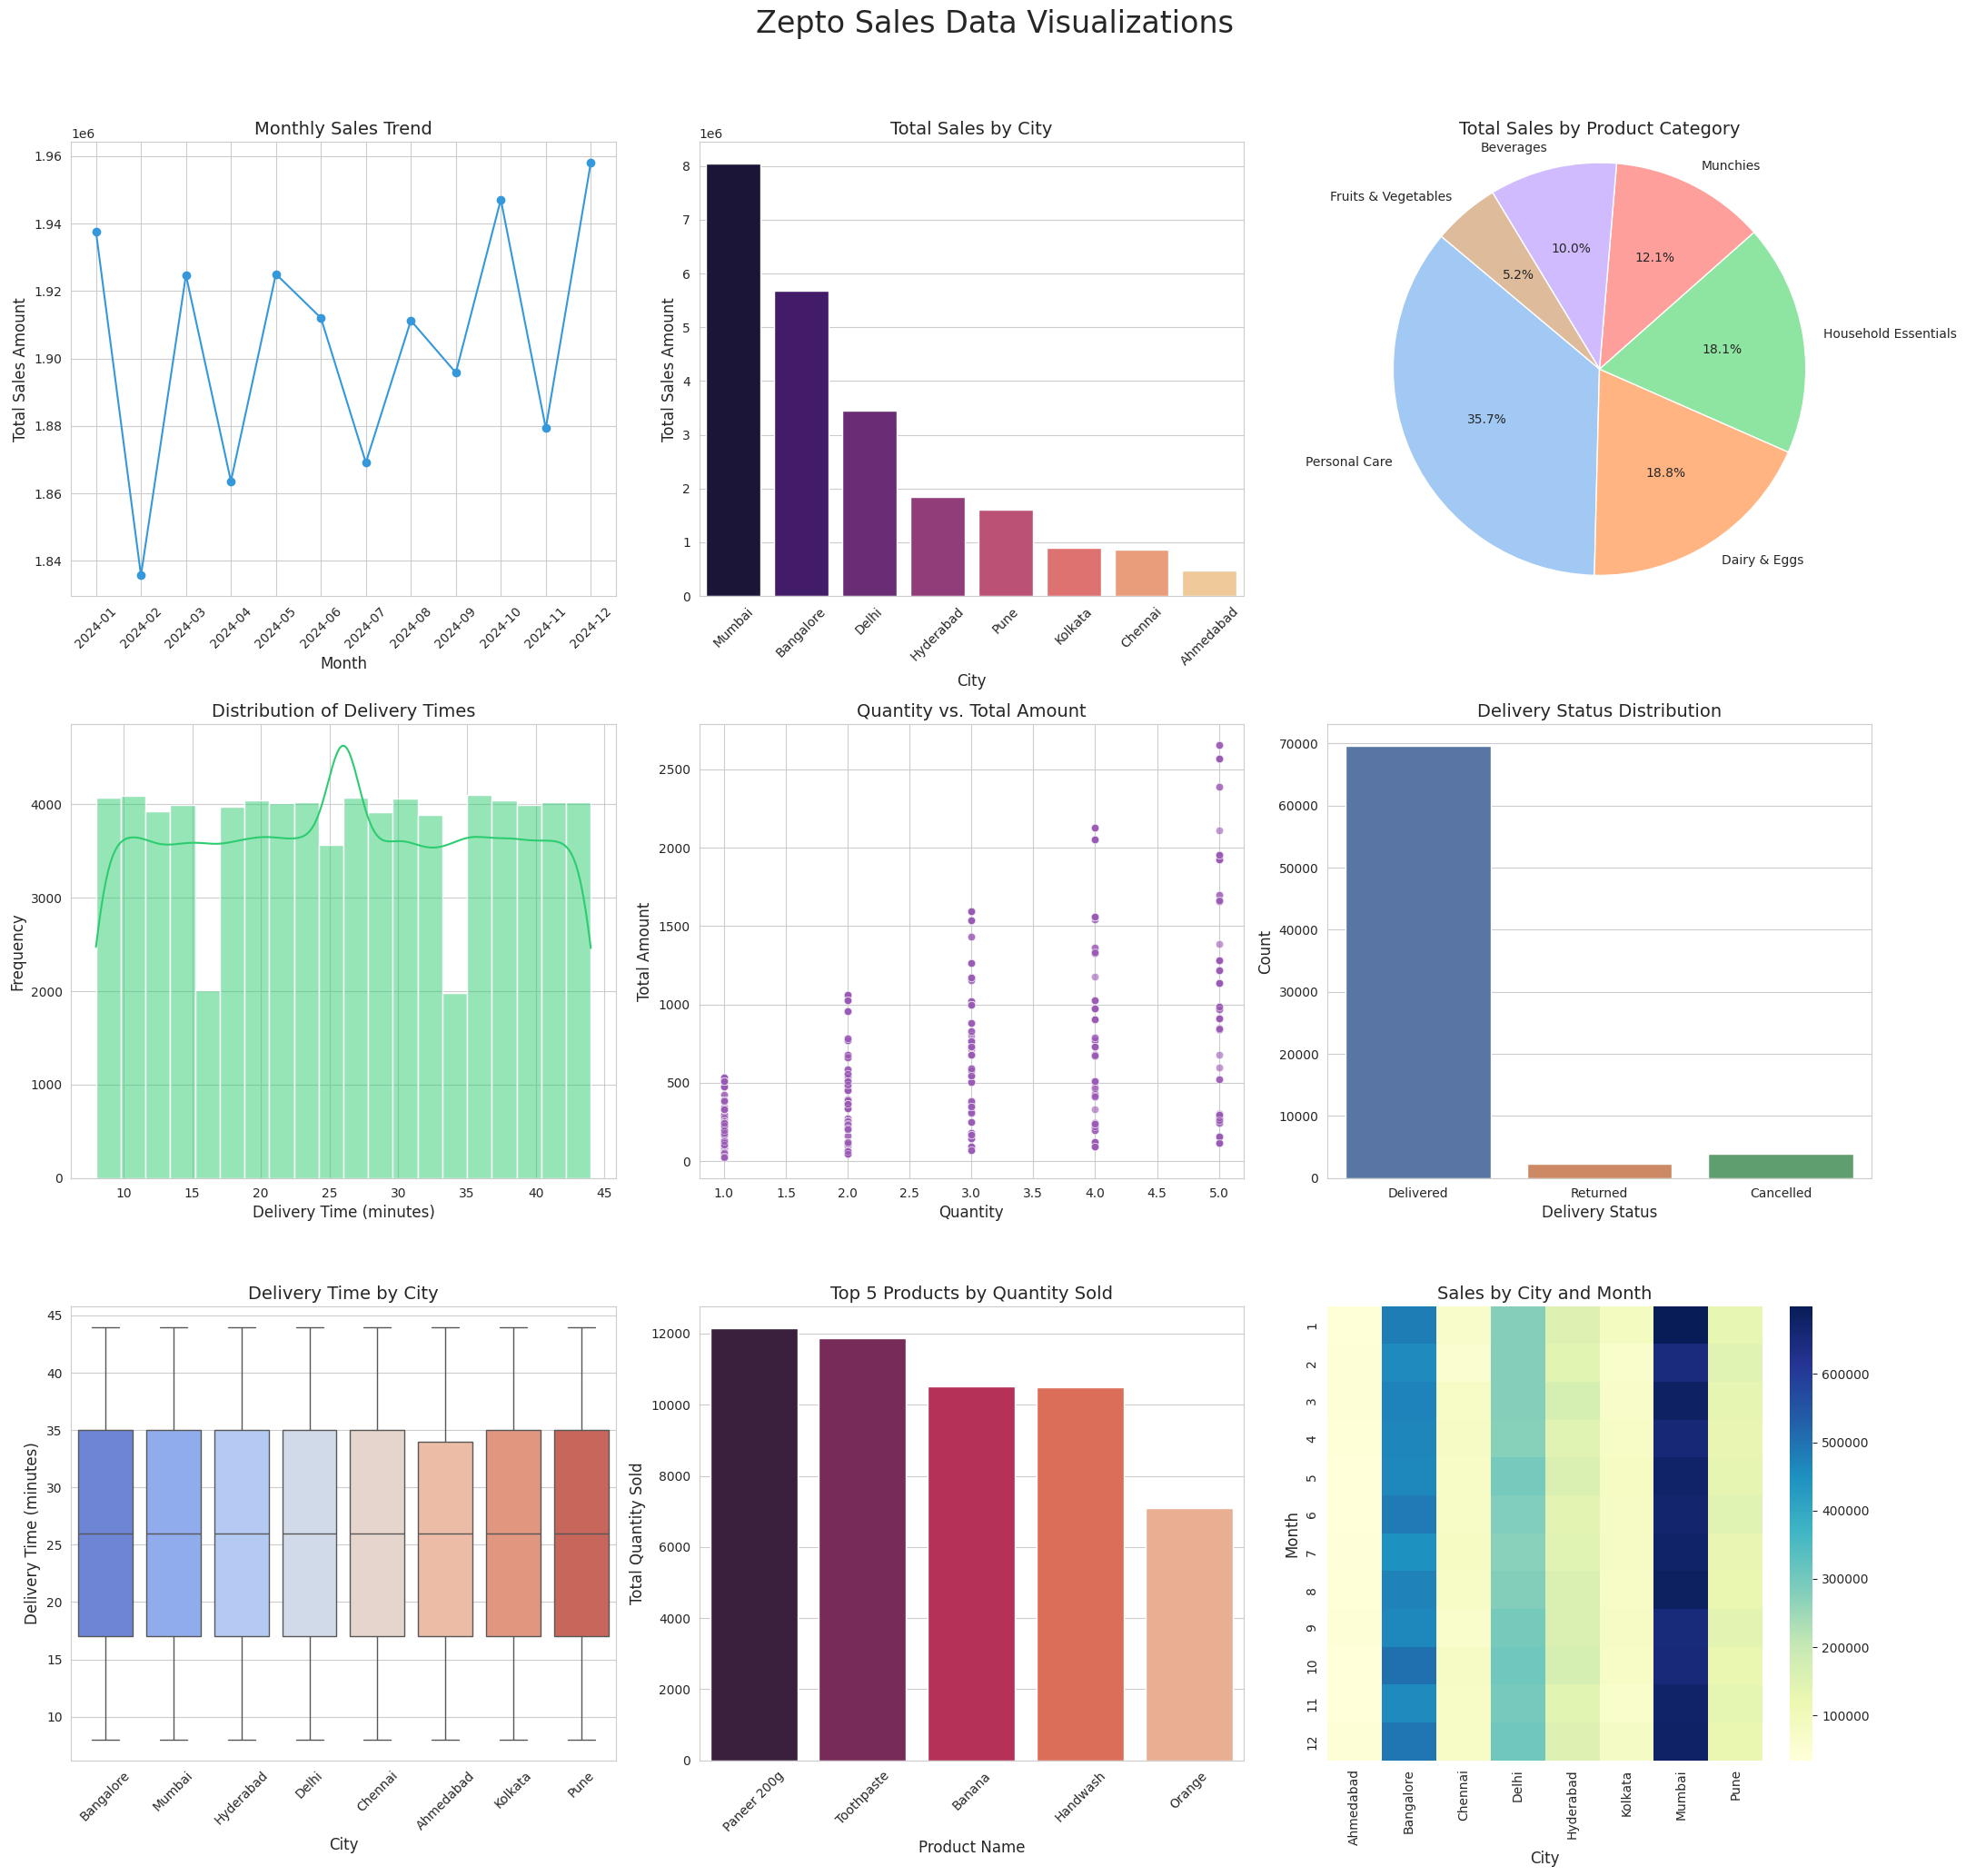

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Create a 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(22, 20))
fig.suptitle("Zepto Sales Data Visualizations", fontsize=24, y=1.03)

# Plot 1: Monthly Sales Trend (Line Chart)
axes[0, 0].plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', color='#3498DB')
axes[0, 0].set_title('Monthly Sales Trend', fontsize=14)
axes[0, 0].set_xlabel('Month', fontsize=12)
axes[0, 0].set_ylabel('Total Sales Amount', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True)

# Plot 2: Total Sales by City (Bar Chart)
sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette='magma', ax=axes[0, 1])
axes[0, 1].set_title('Total Sales by City', fontsize=14)
axes[0, 1].set_xlabel('City', fontsize=12)
axes[0, 1].set_ylabel('Total Sales Amount', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Sales by Product Category (Pie Chart)
axes[0, 2].pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[0, 2].set_title('Total Sales by Product Category', fontsize=14)
axes[0, 2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot 4: Distribution of Delivery Times (Histogram)
sns.histplot(df_sales['delivery_time_mins'], bins=20, kde=True, color='#2ECC71', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Delivery Times', fontsize=14)
axes[1, 0].set_xlabel('Delivery Time (minutes)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)

# Plot 5: Quantity vs. Total Amount (Scatter Plot)
sns.scatterplot(x='quantity', y='total_amount', data=df_sales.sample(n=5000), alpha=0.6, color='#9B59B6', ax=axes[1, 1]) # Sample for performance
axes[1, 1].set_title('Quantity vs. Total Amount', fontsize=14)
axes[1, 1].set_xlabel('Quantity', fontsize=12)
axes[1, 1].set_ylabel('Total Amount', fontsize=12)

# Plot 6: Delivery Status Distribution (Count Plot)
sns.countplot(x='delivery_status', data=df_sales, palette='deep', ax=axes[1, 2])
axes[1, 2].set_title('Delivery Status Distribution', fontsize=14)
axes[1, 2].set_xlabel('Delivery Status', fontsize=12)
axes[1, 2].set_ylabel('Count', fontsize=12)

# Plot 7: Delivery Time by City (Box Plot)
sns.boxplot(x='city', y='delivery_time_mins', data=df_sales, palette='coolwarm', ax=axes[2, 0])
axes[2, 0].set_title('Delivery Time by City', fontsize=14)
axes[2, 0].set_xlabel('City', fontsize=12)
axes[2, 0].set_ylabel('Delivery Time (minutes)', fontsize=12)
axes[2, 0].tick_params(axis='x', rotation=45)

# Plot 8: Top 5 Products by Quantity Sold (Bar Plot)
top_products_qty = df_sales.groupby('product_id')['quantity'].sum().nlargest(5).reset_index()
top_products_qty = top_products_qty.merge(df_products, on='product_id')
sns.barplot(x='product_name', y='quantity', data=top_products_qty, palette='rocket', ax=axes[2, 1])
axes[2, 1].set_title('Top 5 Products by Quantity Sold', fontsize=14)
axes[2, 1].set_xlabel('Product Name', fontsize=12)
axes[2, 1].set_ylabel('Total Quantity Sold', fontsize=12)
axes[2, 1].tick_params(axis='x', rotation=45)

# Plot 9: Sales by City and Month (Heatmap)
sales_city_month = df_sales.groupby([df_sales['order_date'].dt.month, 'city'])['total_amount'].sum().unstack(fill_value=0)
sns.heatmap(sales_city_month, cmap='YlGnBu', ax=axes[2, 2])
axes[2, 2].set_title('Sales by City and Month', fontsize=14)
axes[2, 2].set_xlabel('City', fontsize=12)
axes[2, 2].set_ylabel('Month', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

## Conclusion

Congratulations! You have successfully completed an end-to-end data analysis project using Python, Pandas, Matplotlib, and Seaborn. You have learned to:

*   Load and explore datasets.
*   Clean data by handling missing values and duplicates.
*   Perform various data aggregations and groupings to extract insights.
*   Visualize your findings using different types of plots.

This foundational experience is crucial for any data analyst. Remember to interpret your findings and consider what business questions these visualizations might answer for Zepto! Keep practicing and exploring new datasets to hone your skills.